In [88]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

df = pd.read_csv("howpop_train.csv")

2\. Удалите столбцы, названия которых заканчиваются на _lognorm. Выберите их с
помощью filter() и удалите drop-ом:

In [89]:
df.drop(
    filter(lambda c: c.endswith("_lognorm"), df.columns),
    axis=1,
    inplace=True,
)
# df.dropna(inplace=True)

3\. Столбец published (время публикации) содержит строки. Чтобы работать с этими
данными как с датой/временем публикации, приведите их к типу datetime:

In [90]:
df["published"] = pd.to_datetime(df.published, yearfirst=True)
df

,url,domain,post_id,published,author,flow,polling,content_len,title,comments,favs,views,votes_plus,votes_minus
0,https://habrahabr.ru/post/18284/,habrahabr.ru,18284,2008-01-01 18:19:00,@Tapac,develop,False,4305,Новогодний подарок блоггерам — WordPress 2.3.2,0,0,236,0.0,0.0
1,https://habrahabr.ru/post/18285/,habrahabr.ru,18285,2008-01-01 18:30:00,@DezmASter,design,False,7344,"Сумасшедшие яйца, или сервис для отслеживания ...",1,1,353,1.0,0.0
2,https://habrahabr.ru/post/18286/,habrahabr.ru,18286,2008-01-01 18:34:00,@DezmASter,design,False,8431,"Сумасшедшие яйца, или сервис для отслеживания ...",47,72,1200,45.0,5.0
3,https://habrahabr.ru/post/18291/,habrahabr.ru,18291,2008-01-02 01:32:00,@Taoorus,design,False,5662,"Сглаживание шрифтов, и субпиксельная отрисовка",102,36,5700,72.0,3.0
4,https://geektimes.ru/post/18294/,geektimes.ru,18294,2008-01-02 14:34:00,@dennydo,NaN,False,3706,Почему мне не нравится iPhone,230,6,1400,73.0,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134132,https://habrahabr.ru/company/mailru/blog/314014/,habrahabr.ru,314014,2016-10-31 21:45:00,NaN,develop,False,56033,Парсинг JSON — это минное поле,58,347,35500,164.0,6.0
134133,https://geektimes.ru/post/282086/,geektimes.ru,282086,2016-10-31 22:44:00,@marks,NaN,False,5504,Заработала система раннего предупреждения НАСА...,52,16,12900,22.0,0.0
134134,https://geektimes.ru/post/282090/,geektimes.ru,282090,2016-10-31 23:26:00,@Shapelez,NaN,False,2883,Арзамасский городской суд постановил заблокиро...,16,14,15800,28.0,4.0
134135,https://geektimes.ru/post/282092/,geektimes.ru,282092,2016-10-31 23:52:00,@ragequit,NaN,False,5735,Медиа-коммуникационный союз планирует внести в...,47,14,15000,20.0,0.0


4\. Создайте несколько столбцов на основе данных о времени публикации:

In [91]:
df["year"] = [d.year for d in df.published]
df["month"] = [d.month for d in df.published]
df["dayofweek"] = [d.isoweekday() for d in df.published]
df["hour"] = [d.hour for d in df.published]
df

,url,domain,post_id,published,author,flow,polling,content_len,title,comments,favs,views,votes_plus,votes_minus,year,month,dayofweek,hour
0,https://habrahabr.ru/post/18284/,habrahabr.ru,18284,2008-01-01 18:19:00,@Tapac,develop,False,4305,Новогодний подарок блоггерам — WordPress 2.3.2,0,0,236,0.0,0.0,2008,1,2,18
1,https://habrahabr.ru/post/18285/,habrahabr.ru,18285,2008-01-01 18:30:00,@DezmASter,design,False,7344,"Сумасшедшие яйца, или сервис для отслеживания ...",1,1,353,1.0,0.0,2008,1,2,18
2,https://habrahabr.ru/post/18286/,habrahabr.ru,18286,2008-01-01 18:34:00,@DezmASter,design,False,8431,"Сумасшедшие яйца, или сервис для отслеживания ...",47,72,1200,45.0,5.0,2008,1,2,18
3,https://habrahabr.ru/post/18291/,habrahabr.ru,18291,2008-01-02 01:32:00,@Taoorus,design,False,5662,"Сглаживание шрифтов, и субпиксельная отрисовка",102,36,5700,72.0,3.0,2008,1,3,1
4,https://geektimes.ru/post/18294/,geektimes.ru,18294,2008-01-02 14:34:00,@dennydo,NaN,False,3706,Почему мне не нравится iPhone,230,6,1400,73.0,15.0,2008,1,3,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134132,https://habrahabr.ru/company/mailru/blog/314014/,habrahabr.ru,314014,2016-10-31 21:45:00,NaN,develop,False,56033,Парсинг JSON — это минное поле,58,347,35500,164.0,6.0,2016,10,1,21
134133,https://geektimes.ru/post/282086/,geektimes.ru,282086,2016-10-31 22:44:00,@marks,NaN,False,5504,Заработала система раннего предупреждения НАСА...,52,16,12900,22.0,0.0,2016,10,1,22
134134,https://geektimes.ru/post/282090/,geektimes.ru,282090,2016-10-31 23:26:00,@Shapelez,NaN,False,2883,Арзамасский городской суд постановил заблокиро...,16,14,15800,28.0,4.0,2016,10,1,23
134135,https://geektimes.ru/post/282092/,geektimes.ru,282092,2016-10-31 23:52:00,@ragequit,NaN,False,5735,Медиа-коммуникационный союз планирует внести в...,47,14,15000,20.0,0.0,2016,10,1,23


5\. Используя Seaborn, постройте визуализацию и покажите в каком месяце (и какого
года) было больше всего публикаций.

/home/qod3r/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:712: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


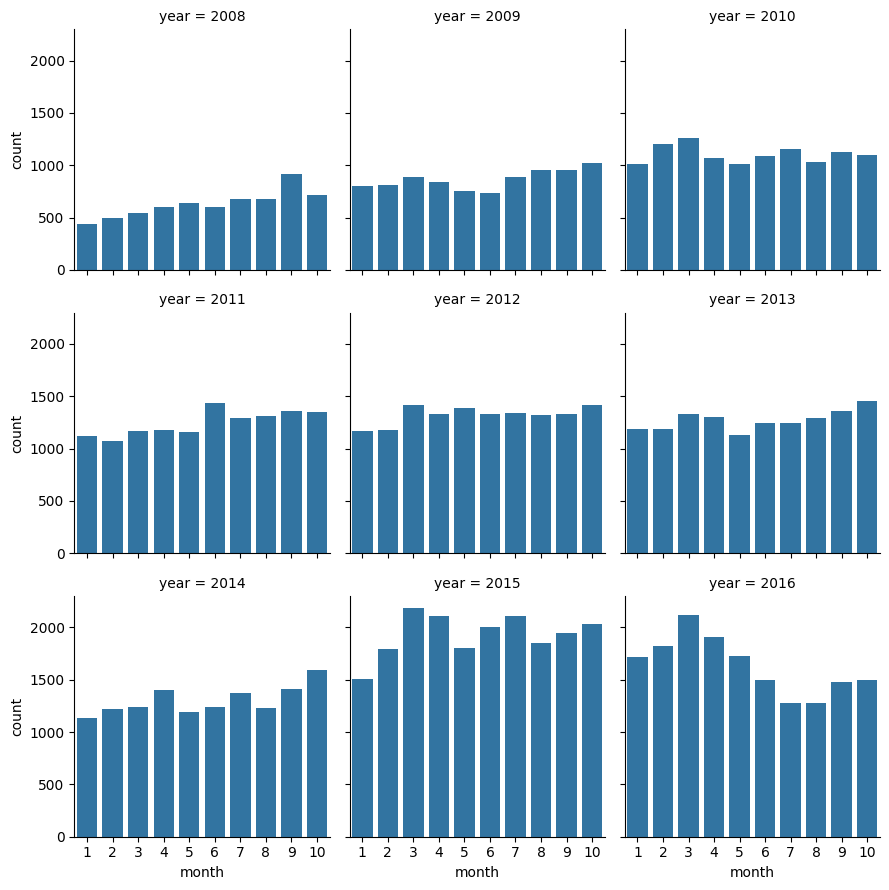

In [92]:
data = df[['year', 'month']]

g = sb.FacetGrid(data, col='year', col_wrap=3)
g.map(sb.countplot, 'month')

6\. Используя Seaborn, постройте график зависимости числа публикаций от дня недели,
используя параметр hue.


<AxesSubplot:xlabel='dayofweek', ylabel='count'>

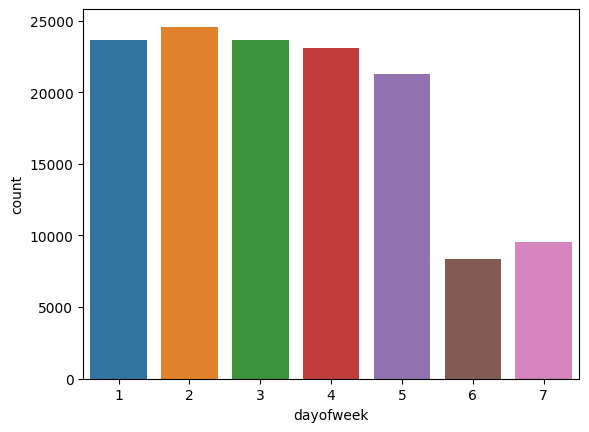

In [93]:
sb.countplot(x=df['dayofweek'])

7\. Используя Seaborn, проведите визуальный анализ и отметьте верные утверждения
про данный датасет:
- Больше всего просмотров набирают статьи, опубликованные в 12 часов дня - false

- Больше всего просмотров набирают статьи, опубликованные в 6 часов утра - true


<AxesSubplot:xlabel='hour', ylabel='views'>

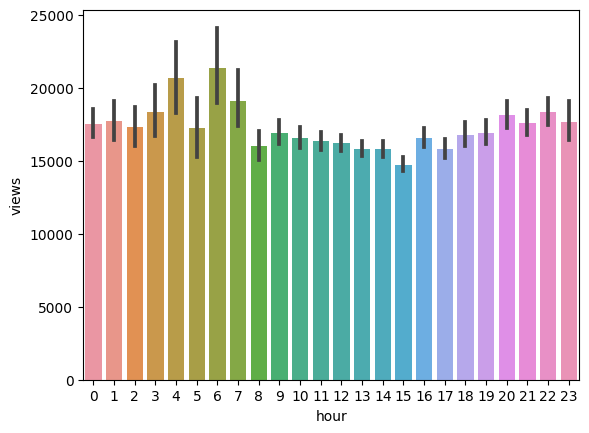

In [94]:
sb.barplot(data=df, x='hour', y='views')

- У опубликованных в 10 утра постов больше всего комментариев - false


<AxesSubplot:xlabel='hour', ylabel='comments'>

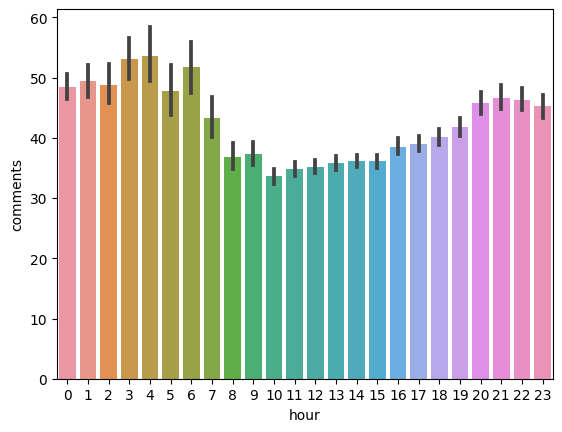

In [95]:
sb.barplot(data=df, x='hour', y='comments')

- Максимальное число комментариев на гиктаймсе набрала статья, опубликованная в 9 часов вечера - false


/tmp/ipykernel_2083/1842123041.py:1: FutureWarning: Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError will be raised. Before calling .max, select only columns which should be valid for the function.
  hours = df.groupby(["hour"], as_index=False).max()


<AxesSubplot:xlabel='hour', ylabel='comments'>

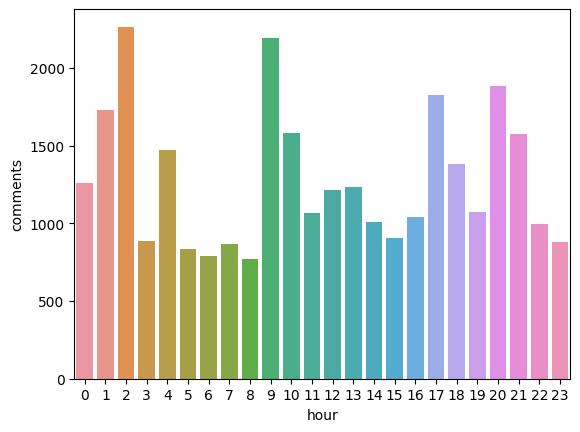

In [96]:
hours = df.groupby(["hour"], as_index=False).max()
sb.barplot(data=hours, x='hour', y='comments')

- На хабре дневные статьи комментируют чаще, чем вечерние - false

<AxesSubplot:xlabel='daytime', ylabel='comments'>

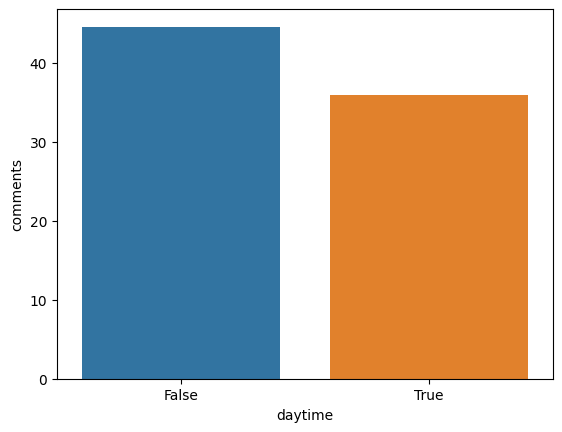

In [97]:
daytime = lambda x: x >= 8 and x < 17
df['daytime'] = df['hour'].apply(daytime)
daytime_comments = df.groupby(['daytime'], as_index=False).mean()
sb.barplot(data=daytime_comments, x='daytime', y='comments')

8\. Используя Seaborn, проведите визуальный анализ и определите кого из топ-20
авторов чаще всего минусуют? - @Mithgol


<AxesSubplot:xlabel='votes_minus', ylabel='author'>

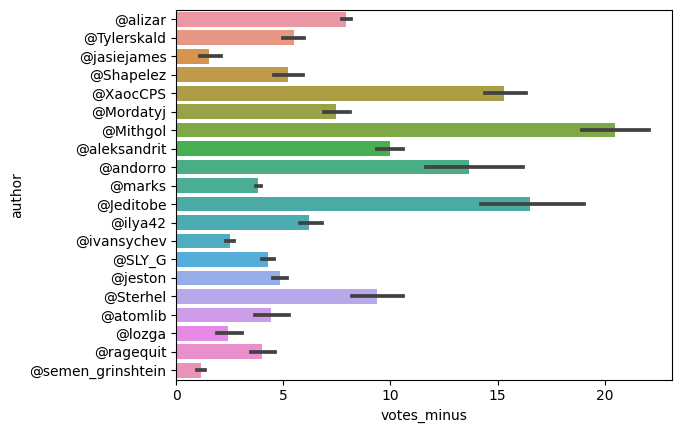

In [98]:
authors = df.groupby(['author'], as_index=False).count().sort_values(by='url', ascending=False)['author'][:20].to_list()
asd = df[df['author'].apply(lambda x: x in authors)]
sb.barplot(data=asd, x='votes_minus', y='author', orient='h')

9\. Используя Seaborn, сравните субботы и понедельники. Правда ли, что по субботам
авторы пишут в основном днём, а по понедельникам — в основном вечером? <br>
По понедельникам вечером пишут реже, чем днем, а по субботам днем и вечером пишут примерно одинаково

<AxesSubplot:xlabel='hour', ylabel='count'>

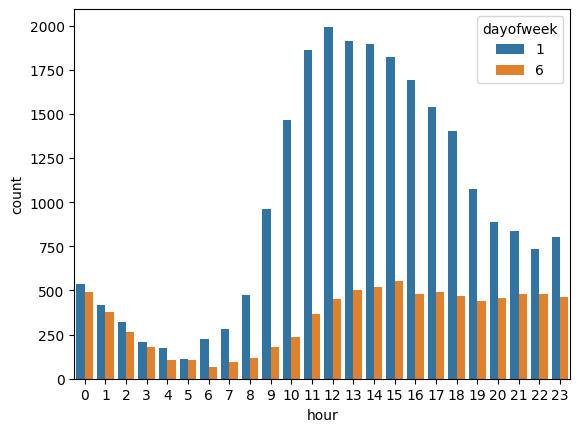

In [99]:
sb.countplot(data=df[df['dayofweek'].isin([6, 1])], x='hour', hue='dayofweek')